# Urban Water Supply & Conservation: Monthly Reports & Analysis

## Create S3 Bucket

In [2]:
!pip install --disable-pip-version-check -q sagemaker==2.29.0
import boto3
import sagemaker

session = boto3.session.Session()
region = session.region_name
sagemaker_session = sagemaker.Session()

# Defining bucket name
bucket = "ads-508-final-project-water-supply"

# Initializing S3 client
s3 = boto3.Session().client(service_name="s3", region_name=region)

# Checking if bucket exists before creating
try:
    s3.head_bucket(Bucket=bucket)
    print(f"Bucket '{bucket}' already exists.")
except:
    # Create bucket
    if region == "us-east-1":
        s3.create_bucket(Bucket=bucket)
    else:
        s3.create_bucket(
            Bucket=bucket,
            CreateBucketConfiguration={"LocationConstraint": region}
        )
    
        print(f"Bucket '{bucket}' created successfully!")

# Store the bucket name for later use
# %store bucket

Bucket 'ads-508-final-project-water-supply' already exists.


In [3]:
print("Default bucket: {}".format(bucket))

Default bucket: ads-508-final-project-water-supply


## Checking Access to Bucket

In [4]:
try:
    response = s3.list_objects_v2(Bucket=bucket)
    print(f"Successfully accessed S3 bucket: {bucket}")
except boto3.exceptions.botocore.exceptions.ClientError as e:
    print(f"[ERROR] Cannot access bucket {bucket}: {e}")

Successfully accessed S3 bucket: ads-508-final-project-water-supply


# Ingest Data to S3

## Uploading Dataset to S3 Bucket

In [5]:
local_dataset_path = "Water_Production_in_California_Dataset.csv"
s3_folder = "datasets"

# Set up the private S3 path
s3_file_path = f"{s3_folder}/{local_dataset_path}"

s3.upload_file(local_dataset_path, bucket, s3_file_path)

try:
    # Check if the file already exists in S3
    response = s3.head_object(Bucket=bucket, Key=s3_file_path)
    print(f"File already exists in S3: s3://{bucket}/{s3_file_path}")
except s3.exceptions.ClientError as e:
    # If file does not exist, upload it
    if e.response["Error"]["Code"] == "404":
        s3.upload_file(local_dataset_path, bucket, s3_file_path)
        print(f"Successfully uploaded {local_dataset_path} to s3://{bucket}/{s3_file_path}")
    else:
        print(f"Error checking file existence: {e}")

File already exists in S3: s3://ads-508-final-project-water-supply/datasets/Water_Production_in_California_Dataset.csv


## Verifying the upload:

In [6]:
response = s3.list_objects_v2(Bucket=bucket, Prefix=s3_folder)

if "Contents" in response:
    print("Files in your S3 bucket:")
    for obj in response["Contents"]:
        print(f" - s3://{bucket}/{obj['Key']}")
else:
    print("No files found in the bucket.")


Files in your S3 bucket:
 - s3://ads-508-final-project-water-supply/datasets/Water_Production_in_California_Dataset.csv


# Exploring the Dataset

In [7]:
import pandas as pd

# Local path of the dataset
local_file_path = "Water_Production_in_California_Dataset.csv"  # Adjust if needed

# Loading the dataset
df = pd.read_csv(local_file_path)

df.head(5)


,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,county_under_drought_declaration,water_shortage_contingency_stage_invoked,...,reported_preliminary_commercial_industrial_and_institutional_water,reported_final_commercial_industrial_and_institutional_water,reported_recycled_water,reported_non_revenue_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,qualification
0,East Bay Municipal Utilities District,CA0110005,2023-04-15,"Alameda,Contra Costa",San Francisco Bay,3,1440000.0,1379000,NaN,NaN,...,NaN,NaN,NaN,NaN,4.026000e+09,5.418000e+09,NaN,0.0,58.7125,1. To provide context…the average R-GPCD for A...
1,East Bay Municipal Utilities District,CA0110005,2023-03-15,"Alameda,Contra Costa",San Francisco Bay,3,1440000.0,1379000,Yes,1,...,739.0,NaN,NaN,NaN,3.672000e+09,4.928000e+09,NaN,0.0,47.7097,1. To provide context…the average R-GPCD for M...
2,East Bay Municipal Utilities District,CA0110005,2023-02-15,"Alameda,Contra Costa",San Francisco Bay,3,1440000.0,1379000,Yes,Stage 2,...,767.0,NaN,NaN,NaN,3.358000e+09,4.016000e+09,NaN,0.0,44.9732,1. To provide context…the average R-GPCD for F...
3,East Bay Municipal Utilities District,CA0110005,2023-01-15,"Alameda,Contra Costa",San Francisco Bay,3,1440000.0,1379000,Yes,Stage 2,...,939.0,NaN,NaN,NaN,3.696000e+09,4.099000e+09,NaN,0.0,48.0215,1. To provide context…the average R-GPCD for J...
4,East Bay Municipal Utilities District,CA0110005,2022-12-15,"Alameda,Contra Costa",San Francisco Bay,3,1430000.0,1379000,Yes,Stage 2,...,816.0,NaN,NaN,NaN,3.722000e+09,4.772000e+09,NaN,0.0,50.3767,1. To provide context…the average R-GPCD for D...


In [8]:
# Display dataset info
df.info()

# Show basic statistics (for numerical columns)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42469 entries, 0 to 42468
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   supplier_name                                                       42469 non-null  object 
 1   public_water_system_id                                              42469 non-null  object 
 2   reporting_month                                                     42469 non-null  object 
 3   county                                                              42469 non-null  object 
 4   hydrologic_region                                                   42469 non-null  object 
 5   climate_zone                                                        42469 non-null  int64  
 6   total_population_served                                             42469 non-null  float64
 7   reference_201

,climate_zone,total_population_served,reference_2014_population,dwr_state_standard_level_corresponding_to_stage,reported_preliminary_total_potable_water_production,reported_final_total_potable_water_production,preliminary_percent_residential_use,final_percent_residential_use,reported_preliminary_commercial_agricultural_water,reported_final_commercial_agricultural_water,reported_preliminary_commercial_industrial_and_institutional_water,reported_final_commercial_industrial_and_institutional_water,reported_recycled_water,reported_non_revenue_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd
count,42469.000000,4.246900e+04,4.246900e+04,5805.000000,6.286000e+03,4.104100e+04,6509.000000,40931.000000,4.640000e+03,1.915000e+04,5.462000e+03,3.312100e+04,2.070700e+04,1.725600e+04,4.246900e+04,4.246900e+04,2.016600e+04,4.246900e+04,42469.000000
mean,9.077869,9.146852e+04,8.926826e+04,1.693023,3.095623e+07,2.947043e+07,70.098838,69.664455,4.043203e+04,1.161988e+05,7.313842e+06,7.082266e+06,1.324146e+05,2.045825e+06,3.702372e+08,4.441297e+08,8.546501e+06,5.508575e+06,100.232696
std,3.802049,2.414043e+05,2.366046e+05,0.941882,2.241106e+08,2.035266e+08,15.621481,14.932979,7.641098e+05,1.852657e+06,6.256312e+07,5.621207e+07,1.697685e+06,2.599415e+07,8.413184e+08,9.880441e+08,5.651661e+07,5.128648e+07,55.843778
min,1.000000,1.000000e+02,1.120000e+02,0.000000,0.000000e+00,3.059000e+00,0.000000,0.050000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+01,3.059000e+06,7.171076e+06,0.000000e+00,0.000000e+00,10.640300
25%,6.000000,2.078400e+04,1.996000e+04,1.000000,2.200901e+02,2.244060e+02,61.900000,61.125000,0.000000e+00,0.000000e+00,3.368500e+01,4.026000e+01,0.000000e+00,0.000000e+00,8.113690e+07,9.938469e+07,0.000000e+00,0.000000e+00,63.867100
50%,9.000000,4.376700e+04,4.339800e+04,2.000000,7.402150e+02,6.983900e+02,71.570000,70.500000,0.000000e+00,0.000000e+00,1.461000e+02,1.550000e+02,0.000000e+00,7.700000e-01,1.772940e+08,2.160000e+08,0.000000e+00,0.000000e+00,84.790300
75%,12.000000,9.255300e+04,9.218500e+04,2.000000,4.441125e+03,2.477100e+03,80.460000,79.780000,0.000000e+00,0.000000e+00,9.435950e+02,6.339000e+02,3.800000e+01,2.900000e+01,3.861334e+08,4.702036e+08,0.000000e+00,0.000000e+00,119.731000
max,16.000000,4.133849e+06,3.960940e+06,5.000000,4.882500e+09,5.252463e+09,111.000000,122.130000,2.420796e+07,5.192563e+07,1.393496e+09,1.401330e+09,7.233471e+07,9.801838e+08,1.658125e+10,1.795669e+10,1.071724e+09,1.023173e+09,660.717000


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 county_under_drought_declaration                                      33532
water_shortage_contingency_stage_invoked                               2661
water_shortage_level_indicator                                        35479
dwr_state_standard_level_corresponding_to_stage                       36664
reported_preliminary_total_potable_water_production                   36183
reported_final_total_potable_water_production                          1428
preliminary_percent_residential_use                                   35960
final_percent_residential_use                                          1538
reported_preliminary_commercial_agricultural_water                    37829
reported_final_commercial_agricultural_water                          23319
reported_preliminary_commercial_industrial_and_institutional_water    37007
reported_final_commercial_industrial_and_institutional_water           9348
reported_recycled_water                                     

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows.")

# If duplicates exist, drop them
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dropped {duplicates} duplicate rows.")


Found 3 duplicate rows.
Dropped 3 duplicate rows.


In [11]:
# Unique values for each column
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


supplier_name: 411 unique values
public_water_system_id: 411 unique values
reporting_month: 108 unique values
county: 61 unique values
hydrologic_region: 10 unique values
climate_zone: 16 unique values
total_population_served: 7642 unique values
reference_2014_population: 408 unique values
county_under_drought_declaration: 2 unique values
water_shortage_contingency_stage_invoked: 798 unique values
water_shortage_level_indicator: 2 unique values
dwr_state_standard_level_corresponding_to_stage: 6 unique values
water_production_units: 4 unique values
reported_preliminary_total_potable_water_production: 5882 unique values
reported_final_total_potable_water_production: 32645 unique values
preliminary_percent_residential_use: 1770 unique values
final_percent_residential_use: 4554 unique values
reported_preliminary_commercial_agricultural_water: 388 unique values
reported_final_commercial_agricultural_water: 1837 unique values
reported_preliminary_commercial_industrial_and_institutional_water

## Detecting Potential Bias

county
Los Angeles         8120
Orange              2975
San Bernardino      2888
San Diego           2256
Riverside           2198
                    ... 
Mono                 105
Kern,Tulare          104
El Dorado,Placer      85
Calaveras             78
Mendocino             70
Name: count, Length: 61, dtype: int64


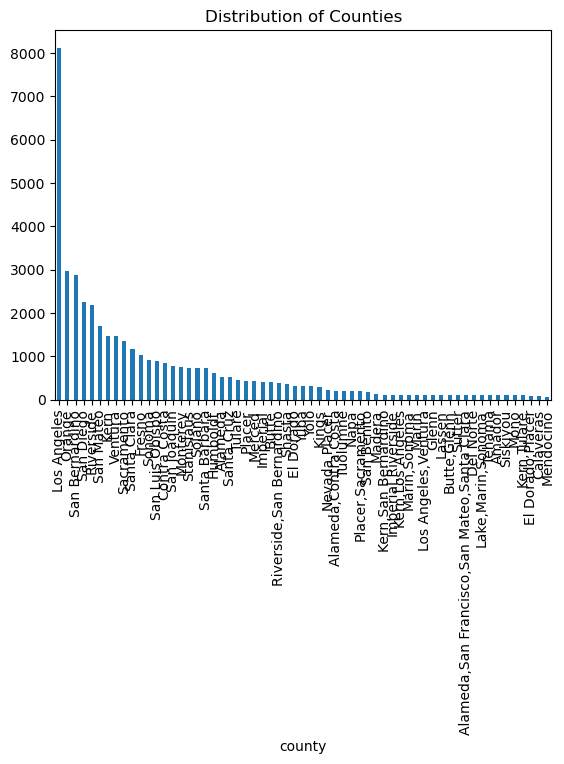

In [12]:
# Example: Check distribution of a categorical feature
if "county" in df.columns:  # Replace with relevant column name
    county_counts = df["county"].value_counts()
    print(county_counts)

    # Visualize distribution
    county_counts.plot(kind="bar", title="Distribution of Counties")


# Release Resources

In [13]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [14]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>